In [1]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere
from encoders import SphericalEncoder

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

/home/justinas/CLTheory/.pixi/envs/default/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using cuda


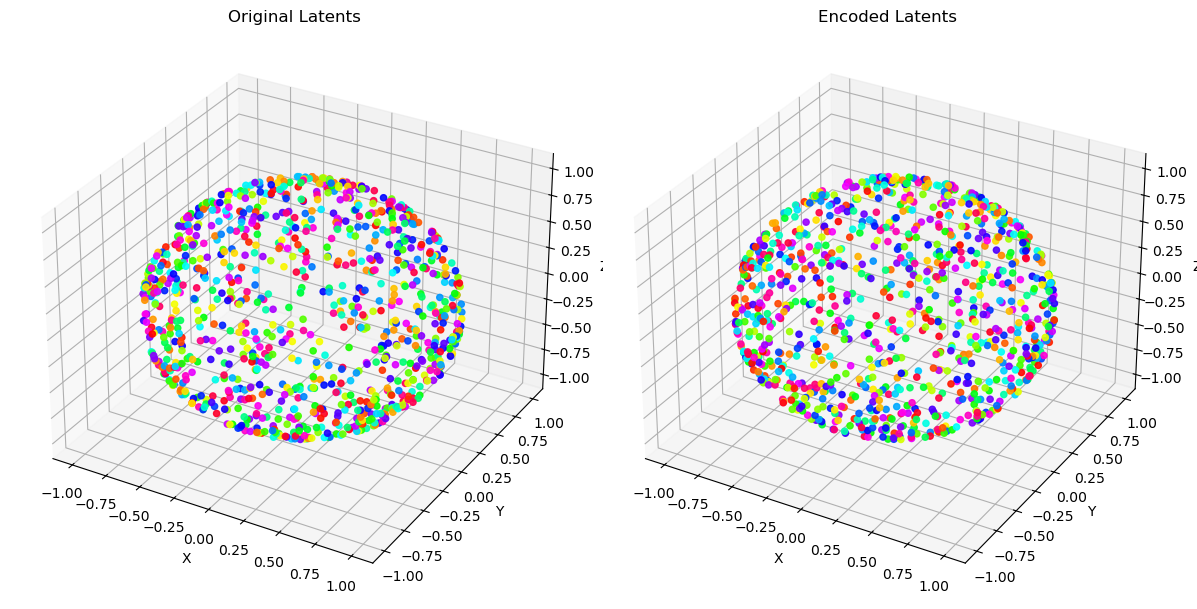

In [2]:
sphere = NSphereSpace(3)
g_spiral = SpiralRotation(2)

z = sphere.uniform(1000)

visualize_spheres_side_by_side(plt, z, g_spiral(z))

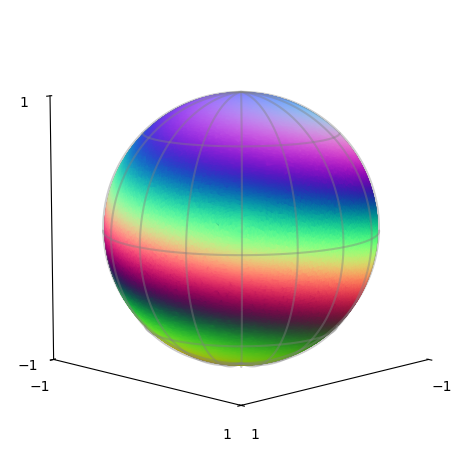

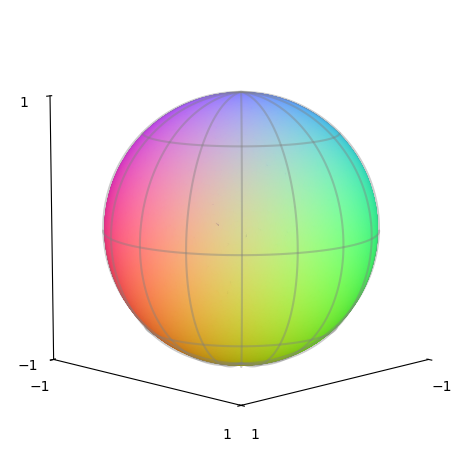

In [3]:
# Seeing the effect of 
z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g_spiral(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

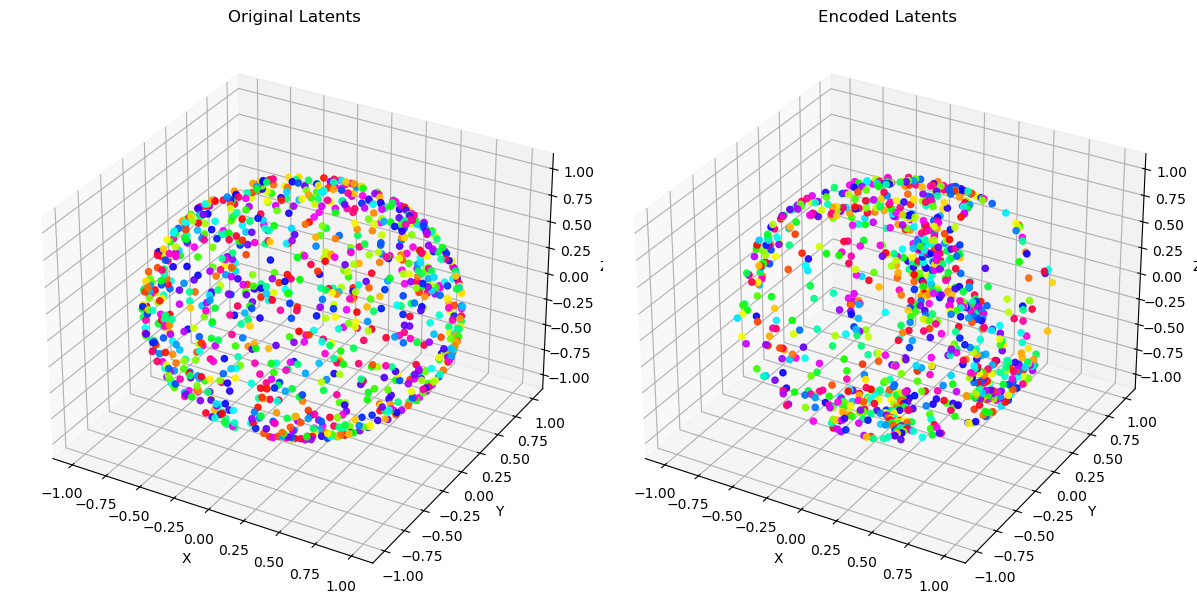

In [4]:
tau = 0.3
kappa = 1 / tau

iterations = 10000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)


f = SphericalEncoder()

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

In [5]:
from visualization_utils.scoring import plot_scores

simclr_vmf = SimCLR(
    f, g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.395194053649902 Samples processed: 1 linear disentanglement: 0.23239187896251678 permutation disentanglement: 0.005900283809751272 angle_preservation_error: 0.2760920822620392
Loss: 8.820291519165039 Samples processed: 21 linear disentanglement: 0.3215456008911133 permutation disentanglement: 0.0012936989078298211 angle_preservation_error: 0.25401127338409424
Loss: 8.524261474609375 Samples processed: 41 linear disentanglement: 0.4137214720249176 permutation disentanglement: 0.01715332269668579 angle_preservation_error: 0.2355281561613083
Loss: 8.316980361938477 Samples processed: 61 linear disentanglement: 0.5545750260353088 permutation disentanglement: 0.04173463582992554 angle_preservation_error: 0.19504494965076447
Loss: 8.210037231445312 Samples processed: 81 linear disentanglement: 0.6248385310173035 permutation disentanglement: 0.04836724326014519 angle_preservation_error: 0.1677171140909195
Loss: 8.188358306884766

KeyboardInterrupt: 

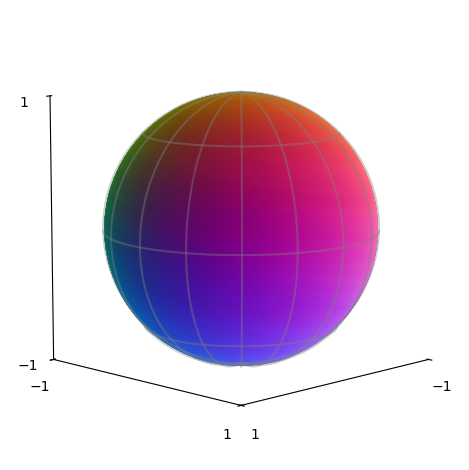

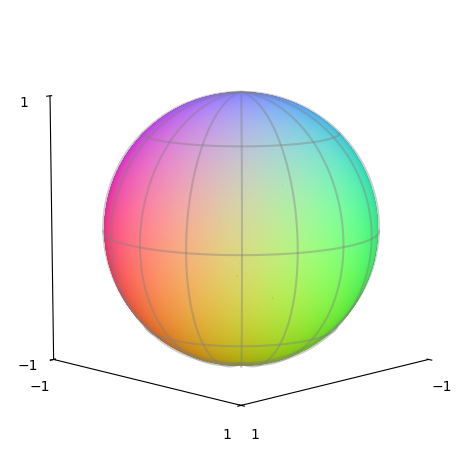

In [28]:
z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

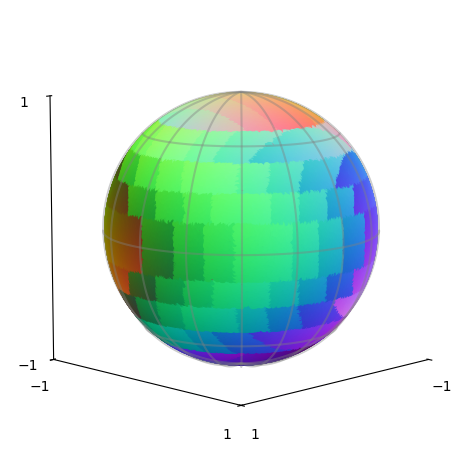

In [68]:
g_patches = Patches(5, device)

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z.cpu(), g_patches(z.to(device)).cpu(), s=10, a=.8)

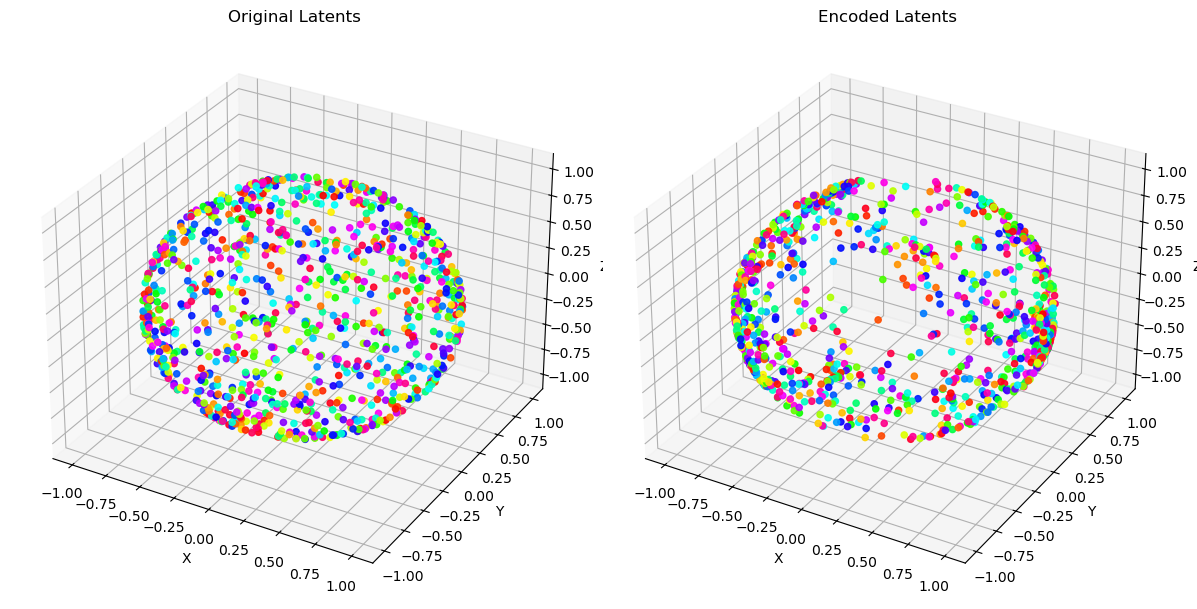

In [86]:

f_patches = SphericalEncoder(hidden_dims=[128, 512, 512, 128]).to(device)# print(f_patches.device)

h_patches = lambda z: f_patches(g_patches(z))

z = sphere.uniform(1000)
z_enc = h_patches(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.067554473876953 Samples processed: 1 linear disentanglement: 0.35615262389183044 permutation disentanglement: 0.03392406180500984 angle_preservation_error: 0.2592562735080719
Loss: 7.9701032638549805 Samples processed: 21 linear disentanglement: 0.9333348274230957 permutation disentanglement: 0.0928630605340004 angle_preservation_error: 0.0804111585021019
Loss: 7.935610771179199 Samples processed: 41 linear disentanglement: 0.9532358050346375 permutation disentanglement: 0.0880788192152977 angle_preservation_error: 0.06547985970973969
Loss: 7.892917156219482 Samples processed: 61 linear disentanglement: 0.9603917002677917 permutation disentanglement: 0.08163255453109741 angle_preservation_error: 0.05937814712524414
Loss: 7.879218101501465 Samples processed: 81 linear disentanglement: 0.9646623134613037 permutation disentanglement: 0.08892329782247543 angle_preservation_error: 0.05548480525612831
Loss: 7.891657829284668 Sa

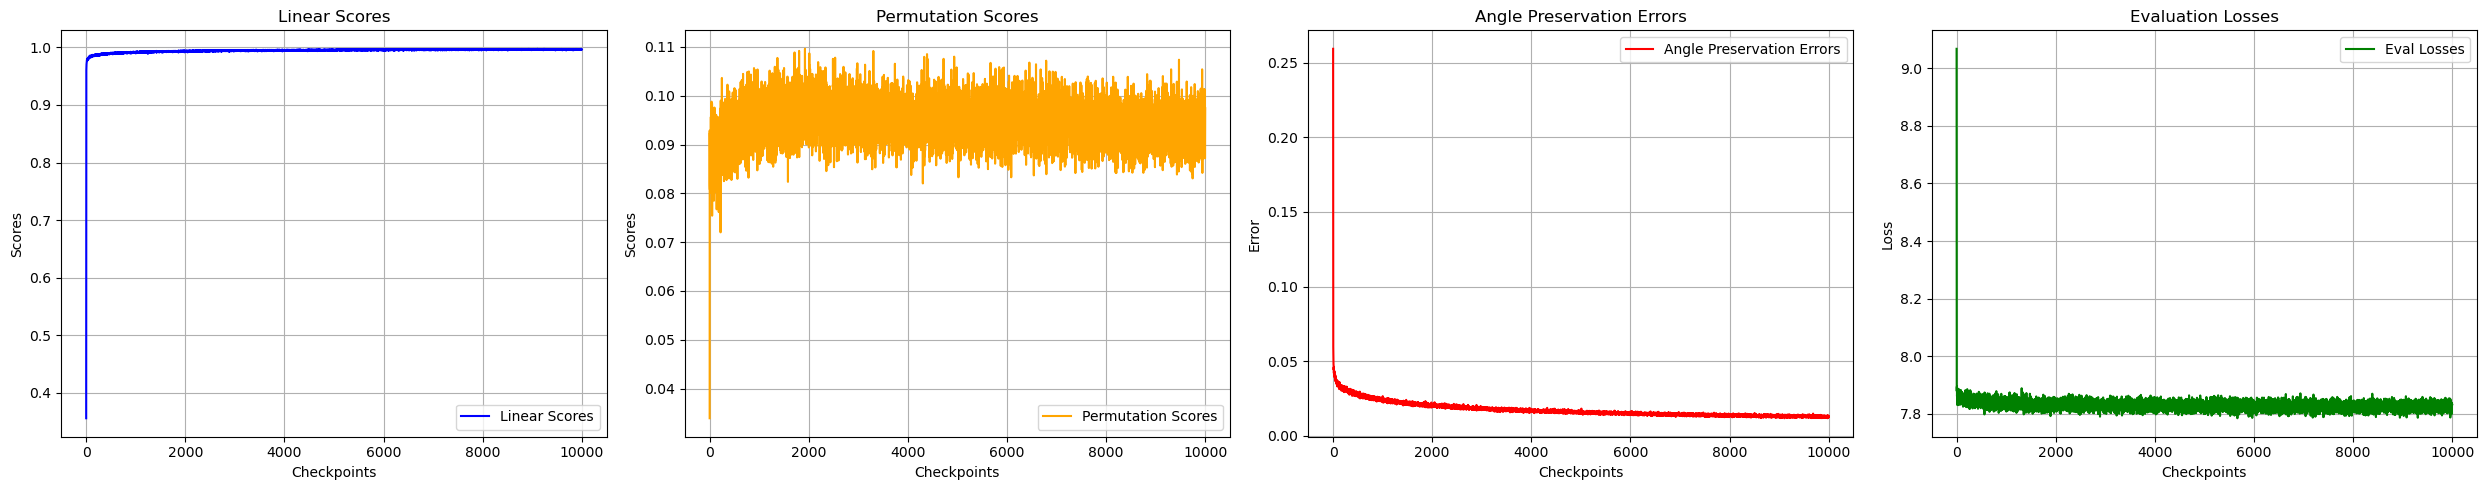

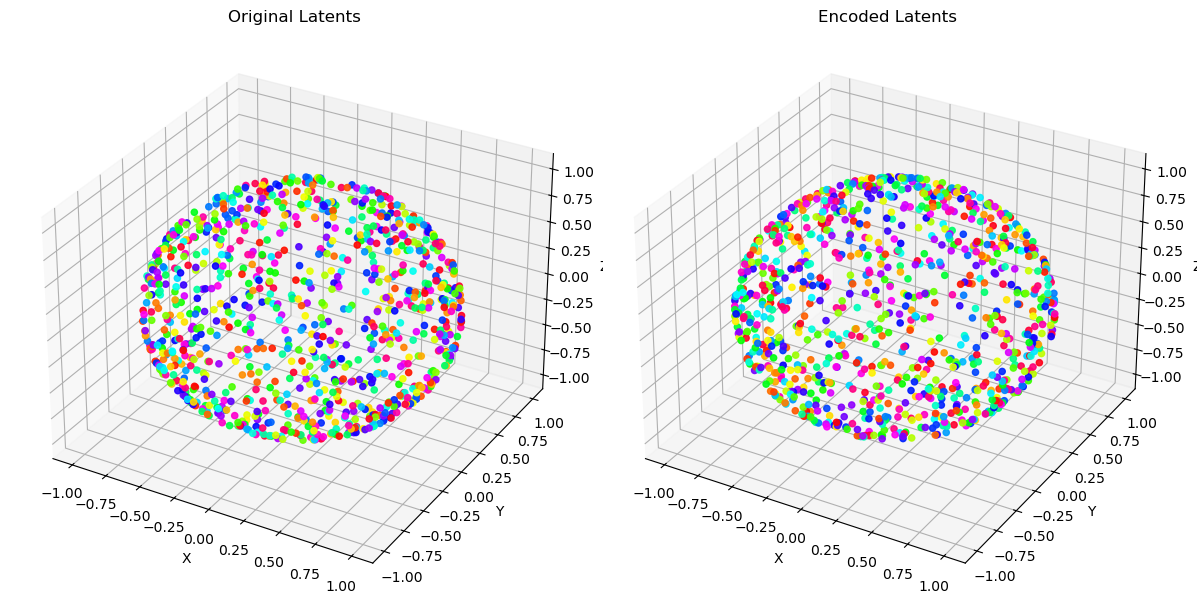

In [87]:
simclr_patches_vmf = SimCLR(
    f_patches, g_patches, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f_patches, scores = simclr_patches_vmf.train(batch, 200000) # TODO: remove * 2

z = sphere.uniform(1000)
z_enc = h_patches(z)

plot_scores(plt, scores)

visualize_spheres_side_by_side(plt, z, z_enc)

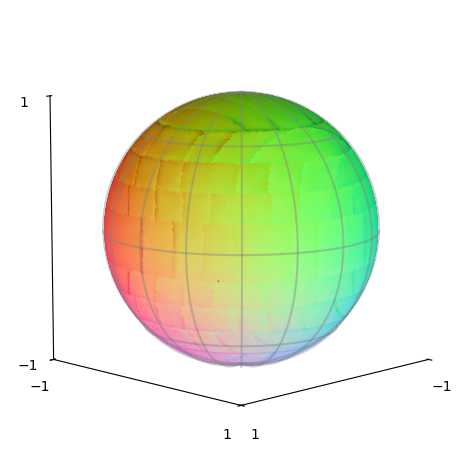

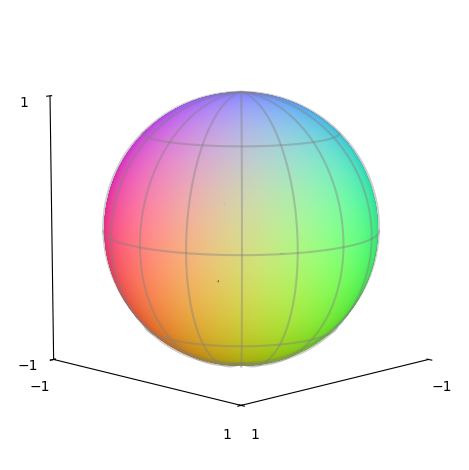

In [82]:
z = sphere.uniform(100000)
z_enc = h_patches(z)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)